# Part 2: A short data story / micro-project

### Exercise: 

Create a short data-story based on the work we've done in class so far. (This exercise is a kind of "micro version" of what we'll be doing in the final project). Follow the directions in the bulleted list below when you create your data-story.

* __Find your own story to tell in the work on analyzing the SF Crime Data that we've done so far__ (Week 1 - Week 6). The idea is to choose an insight about crime in SF (perhaps how something changed over the years) and communicate that insight to a general audience reader.
* The web-page should be hosted on your GitHub Pages site (Week 7).
* The format must be the classic Magazine Genre presented on a single web-page (see the Segel & Heer paper for details).
* The story should have a brief introduction to the dataset so new readers from outside the class can understand what's going on.
* Your story should include three visualizations. Not more than three, not less than three (but multi-panel figures are OK). The figures should be one of each of the following types
    * One time-series / bar chart (it's OK to use the "fancy" plot-typs like calendar plots or polar bar-charts from Week 2, Part 4).
    * One map (use techniques from Week 3 and 4)
    * One interactive visualization in Bokeh (Week 6)

* __At a minimum, the Bokeh visualization should contain different data__ than the exercise we did for Week 6 (it's a plus if it's a new type of viz altogether).
* The two other visualization may be repetitions of figures created during the previous lectures, or they may be new.
* Make the figures nice. Specifically:
    * Aim to make the figures visually consistent (color, fonts, etc)
    * Follow the recommendations from my video on nice figures (Week 2, part 3)
* In terms of the amount of text, I envision something like 500-1500 words (including figure captions). Try to write in your own words - the LLMs have a tendency to write a lot of text and not be so precise. So if the writing is all elegantly written but empty prose, we will be critical. It is OK, however, to have the LLM help you get the grammer, etc. right.
* It is a plus if you can back up some of your findings with external sources, such as news stories from the area, looking up which building is located at some set of lat,lon coordinates, or similar. (So when you see something happening at some time/place in the data, see if you can understand it more deeply by investigating outside the dataset.) Use real references at the end of the text to organize your links to the outside world.

### Brief introduktion to thee dataset

The data that we are working with in this project is *\*Police Department Incident Reports: Historical 2003 to May 2018\**, which is provided by the City and County of San Francisco. The data is about historical reported crimes in San Francisco. It contains 14 columns, each providing essential infomation about the observation, such as time, position and categori of the crime. In this project, we will be focusing on the crime category prostitution and explore how this crime has developed over time.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
## Load files

file = "..\..\Data\Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv"
crime = 'PROSTITUTION'

df = pd.read_csv(file)
df = df[df['Date'].str.contains('2018') == False]

focuscrimes = set([crime])
focusdf = df[df['Category'].isin(focuscrimes)]

_One time-series / bar chart (it's OK to use the "fancy" plot-typs like calendar plots or polar bar-charts from Week 2, Part 4)._


C:\Users\julie\AppData\Local\Temp\ipykernel_13052\742190031.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(years.index, rotation=45)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (15,) and arg 1 with shape (7,).

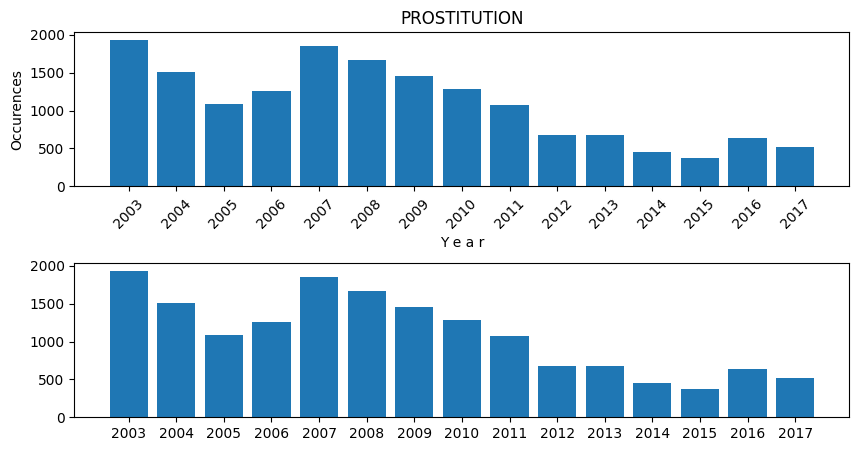

In [19]:
## Amount of focuscrimes per year
years = focusdf[focusdf['Category'] == crime]['Date'].str.split('/').str[2].value_counts().sort_index()

## Amount of focuscrimes per weekday per year
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_weekday_list = np.zeros((len(weekdays), len(years)))
for year in years.index:
    crime_weekday = focusdf[(focusdf['Category'] == crime) & (focusdf['Date'].str.split('/').str[2] == year)]['DayOfWeek'].value_counts()
    crime_weekday = crime_weekday.reindex(index=weekdays)
    crime_weekday_list.append(crime_weekday.values)


## Plotting
fig, axes = plt.subplots(2,1, figsize=(10, 5))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

axes[0].bar(years.index, years)
axes[0].set_title(crime)
axes[0].set_xticklabels(years.index, rotation=45)
axes[0].set_ylabel('Occurences')
axes[0].set_xlabel('Y e a r')



# Create the bar plot
axes[1].bar(years.index, years, label='Total')
for i, weekday in enumerate(weekdays):
    axes[1].bar(years.index, crime_weekday_list[i], bottom=years, label=weekday)

# Set the labels and title
axes[1].xlabel('Year')
axes[1].ylabel('Occurrences')
axes[1].title('Occurrences of Focus Crimes per Year and Weekday')
axes[1].xticks(years.index, rotation=45)
axes[1].legend()

# Show the plot
plt.show()

# axes[1].bar(weekday.index, weekday)
# axes[1].set_ylim(weekday.min()*0.8, weekday.max()*1.1)
# axes[1].set_ylabel('Occurences')
# axes[1].set_xlabel('Week day')
# axes[1].set_xticklabels(weekday.index, rotation=45)

# plt.show()


In [22]:
print(crime_weekday_list)

crime_weekday_list[0][0]

[array([ 94, 451, 464, 456, 407,  39,  26], dtype=int64), array([ 53, 290, 452, 324, 286,  65,  35], dtype=int64), array([ 64, 286, 235, 205, 174,  76,  48], dtype=int64), array([ 80, 224, 277, 281, 215,  65, 122], dtype=int64), array([137, 364, 374, 309, 287, 198, 179], dtype=int64), array([122, 396, 312, 277, 174, 253, 128], dtype=int64), array([127, 288, 347, 253, 161, 159, 122], dtype=int64), array([127, 183, 213, 279, 199, 149, 131], dtype=int64), array([ 49,  98, 164, 221, 207, 233, 106], dtype=int64), array([ 36, 101, 128, 171, 104, 106,  32], dtype=int64), array([ 51, 146, 133, 108,  99,  95,  46], dtype=int64), array([ 36,  76,  66,  83, 146,  18,  24], dtype=int64), array([ 41,  21,  27, 162,  71,  29,  19], dtype=int64), array([ 22,  29,  37, 350, 133,  47,  17], dtype=int64), array([ 84,  50,  62, 151, 113,  39,  24], dtype=int64)]


94

_One map (use techniques from Week 3 and 4)_


_One interactive visualization in Bokeh (Week 6)_